<a href="https://colab.research.google.com/github/extrajp2014/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

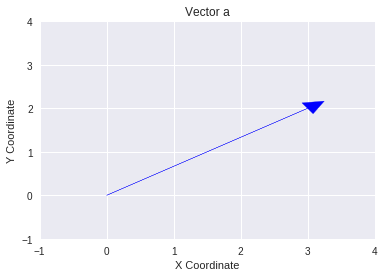

In [146]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

a = [3, 2]
plt.axis([-1,4,-1,4])
plt.arrow(0,0, a[0], a[1], head_width=.3, head_length=.3, color = 'b')
# Add text
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Vector a')
plt.show();


plt.show();

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [124]:
b = [17, -4, -2, 1]
print ('norm b =', np.linalg.norm(b))
print("Norm represents the magnitude of the vector.")

norm b = 17.60681686165901
Norm represents the magnitude of the vector.


## 1.3 Find $\vec{c} \cdot \vec{d}$

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [125]:
c = [3, 7, -2, 12]
d = [9, -7, 4, 6]
print ('c dot d =', np.dot(c,d))

c dot d = 42


## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [126]:
E = np.array([[7, 4, 2],
              [1, 3, -1],
              [2, 6, -4]])
print ('E^-1 =')
print(np.linalg.inv(E))
print("------------")
print ('E^T =')
print(np.transpose(E))

E^-1 =
[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]
------------
E^T =
[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, variance, and standard deviation for both the number of customers and inches of new snow for the week. You may use library functions, dataframes, .describe(), etc. 



In [164]:
import pandas as pd

customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

df = pd.DataFrame({'customers': customers, 'snow': snow})

df.head()

,customers,snow
0,820,0
1,760,1
2,1250,7
3,990,1
4,1080,0


In [175]:
def mean_variance_stdev(items):
  length=len(items)
  mean = sum(items) / length
  difference = [i - mean for i in items]
  sqdifference = [i ** 2 for i in difference]
  variance = sum(sqdifference)/(length-1) # dof n-1 for samples
  stdev = variance ** 0.5
  return  mean, variance, stdev


for i in ["customers","snow"]:
  print(i+" stats")
  print("mean is",mean_variance_stdev(df[i])[0])
  print("variance is",mean_variance_stdev(df[i])[1])
  print("stdev is",mean_variance_stdev(df[i])[2])
  print("------Numpy Method------")
  print("np.mean is",np.mean(df[i]))
  print("np.var",np.var(df[i],ddof=1))
  print("np.stdev is",np.std(df[i],ddof=1))
  print("------Pandas Method------")
  print("panda mean is",df[i].describe()['mean'])
  print("panda variance is",df[i].var())
  print("panda stdev is",df[i].describe()['std'])
  print("")

customers stats
mean is 1135.7142857142858
variance is 98761.90476190478
stdev is 314.26406851866597
------Numpy Method------
np.mean is 1135.7142857142858
np.var 98761.90476190478
np.stdev is 314.26406851866597
------Pandas Method------
panda mean is 1135.7142857142858
panda variance is 98761.90476190478
panda stdev is 314.26406851866597

snow stats
mean is 2.7142857142857144
variance is 8.571428571428571
stdev is 2.9277002188455996
------Numpy Method------
np.mean is 2.7142857142857144
np.var 8.571428571428571
np.stdev is 2.9277002188455996
------Pandas Method------
panda mean is 2.7142857142857144
panda variance is 8.571428571428571
panda stdev is 2.9277002188455996



## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

In [129]:
print("No, they using two different units of measurement.")
print("Therefore, inches of snow's variance is not comparable to number of customers' variance.")
print("However, you can compare their relationship by using their covariance.")


No, they using two different units of measurement.
Therefore, inches of snow's variance is not comparable to number of customers' variance.
However, you can compare their relationship by using their covariance.


## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [130]:
df.cov()

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [0]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

In [154]:
# preview data
print("df shape:"), print(df.shape), print("")
print("df columns:"), print(df.columns), print("")
print("df dtypes:"), print(df.dtypes), print("")
print("df head():"), print(df.head()), print("")
print("df isnull().sum().sum():"), print(df.isnull().sum().sum()), print("")
print("df isnull().sum():"), print(df.isnull().sum()), print("")
# stats data
print("df corr():"), print(df.corr()), print("")
print("df describe(include='all'):"), print(df.describe(include='all')), print("")

df shape:
(4, 18)

df columns:
Index(['Alcoholic Drinks', 'Beverages', 'Carcass_Meat', 'Cereals', 'Cheese',
       'Confectionery', 'Country', 'Fats_and_Oils', 'Fish', 'Fresh_Fruit',
       'Fresh_Potatoes', 'Fresh_Veg', 'Other_Meat', 'Other_Veg',
       'Processed_Potatoes', 'Processed_Veg', 'Soft_Drinks', 'Sugars'],
      dtype='object')

df dtypes:
Alcoholic Drinks       int64
Beverages              int64
Carcass_Meat           int64
Cereals                int64
Cheese                 int64
Confectionery          int64
Country               object
Fats_and_Oils          int64
Fish                   int64
Fresh_Fruit            int64
Fresh_Potatoes         int64
Fresh_Veg              int64
Other_Meat             int64
Other_Veg              int64
Processed_Potatoes     int64
Processed_Veg          int64
Soft_Drinks            int64
Sugars                 int64
dtype: object

df head():
   Alcoholic Drinks  Beverages  Carcass_Meat  Cereals  Cheese  Confectionery  \
0               37

(None, None, None)

In [155]:
# dropping non-numeric feature
df = df.drop('Country', axis=1)
# print("df dtypes:"), print(df.dtypes), print("")

# 1. standardize data
################################ 
df = df.astype(float)
scaler = StandardScaler()
columns = df.columns.values

df_scale = scaler.fit_transform(df)
df_scale = pd.DataFrame(df_scale, columns=columns)
print(df.head())
print(df_scale.head())

   Alcoholic Drinks  Beverages  Carcass_Meat  Cereals  Cheese  Confectionery  \
0             375.0       57.0         245.0   1472.0   105.0           54.0   
1             475.0       73.0         227.0   1582.0   103.0           64.0   
2             458.0       53.0         242.0   1462.0   103.0           62.0   
3             135.0       47.0         267.0   1494.0    66.0           41.0   

   Fats_and_Oils   Fish  Fresh_Fruit  Fresh_Potatoes  Fresh_Veg  Other_Meat  \
0          193.0  147.0       1102.0           720.0      253.0       685.0   
1          235.0  160.0       1137.0           874.0      265.0       803.0   
2          184.0  122.0        957.0           566.0      171.0       750.0   
3          209.0   93.0        674.0          1033.0      143.0       586.0   

   Other_Veg  Processed_Potatoes  Processed_Veg  Soft_Drinks  Sugars  
0      488.0               198.0          360.0       1374.0   156.0  
1      570.0               203.0          365.0       1256.0 

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. (You may use library functions)

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>


 Projected Data: 
 [[-0.95448984  0.32831832]
 [-4.52095094 -1.73537967]
 [ 0.48797835  3.23367195]
 [ 4.98746242 -1.8266106 ]]
------------


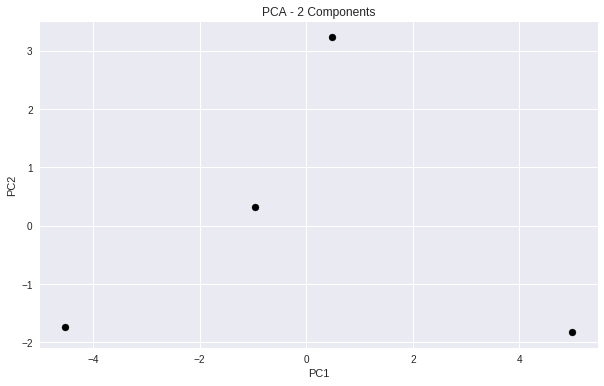

In [156]:
# 2. Principal Component Analysis
################################ 
# A. create the PCA instance
pca = PCA(2)
# B. fit on data
pca.fit(df_scale)
# C. transform data
B = pca.transform(df_scale)
print("\n Projected Data: \n", B)
print("------------")
# D. Convert to df
dfB = pd.DataFrame(B, columns=['PC1', 'PC2'])
# E. Graph
plt.subplots(figsize=(10,6))
plt.scatter(dfB['PC1'], dfB['PC2'], c='k')
# Add text
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - 2 Components')
plt.show();


# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. (You may use library functions)

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [157]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [158]:
#preview data
print("points shape:"), print(points.shape), print("")
print("points columns:"), print(points.columns), print("")
print("points dtypes:"), print(points.dtypes), print("")
print("points sample(7):"), print(points.sample(7)), print("")
print("points isnull().sum().sum():"), print(points.isnull().sum().sum()), print("")
print("points isnull().sum():"), print(points.isnull().sum()), print("")
# stats data
print("points describe(include='all'):"), print(points.describe(include='all')), print("")

points shape:
(200, 2)

points columns:
Index(['x', 'y'], dtype='object')

points dtypes:
x    float64
y    float64
dtype: object

points sample(7):
            x          y
29  -4.683859  -7.267107
181 -0.799163  -8.396208
39  -1.552325  -9.334676
130 -1.814451 -10.228963
6   -8.118990  -3.624109
71  -3.931094  -6.930744
0   -7.846803  -3.421277

points isnull().sum().sum():
0

points isnull().sum():
x    0
y    0
dtype: int64

points describe(include='all'):
                x           y
count  200.000000  200.000000
mean    -2.323298   -3.422869
std      4.556513    5.580888
min    -10.118473  -11.095795
25%     -4.619520   -8.246848
50%     -3.373794   -5.307697
75%     -0.427175    3.360028
max      7.807885    5.883054



(None, None, None)

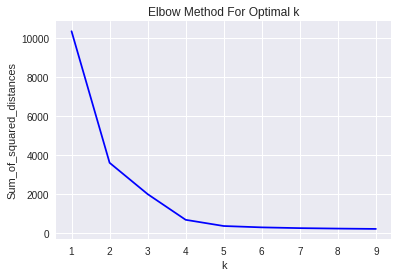

In [159]:
# Find optimal clusters number for Kmeans 
# elbow method - function from lecture
sum_of_squared_distances = []
K = range(1,10) 
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(points)
    sum_of_squared_distances.append(km.inertia_)

# graphing sum of squared distances
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

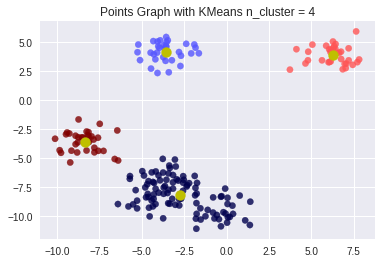

In [160]:
# Kmeans - n_clusters=4
################################ 
kmeans = KMeans(n_clusters=4)
kmeans.fit(points)
points_kmeans = kmeans.predict(points)

plt.scatter(points.x, points.y, c=points_kmeans, s=40, alpha=.8, 
            cmap = 'seismic')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='y', s=100);
plt.title("Points Graph with KMeans n_cluster = 4")
plt.show();

# Elbow method yields 2 or 4 as possible clusters for Kmean
# Graph n_clusters=2 didn't look right
# Visually, it could be 5 clusters

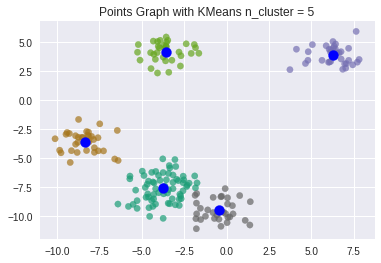

In [161]:
# Kmeans - n_clusters=5
################################ 
kmeans = KMeans(n_clusters=5)
kmeans.fit(points)
points_kmeans = kmeans.predict(points)

plt.scatter(points.x, points.y, c=points_kmeans, s=40, alpha=.7, 
            cmap = 'Dark2')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='b', s=100);
plt.title("Points Graph with KMeans n_cluster = 5")
plt.show();